In [241]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as data
from datetime import datetime
from alpha_vantage.timeseries import TimeSeries


In [243]:
# Initialize the TimeSeries object with your Alpha Vantage API key
ts = TimeSeries(key='your_alpha_vantage_api_key', output_format='pandas')

# Fetch the stock data (daily data for AAPL)
try:
    data, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')

    # Convert index to datetime format
    data.index = pd.to_datetime(data.index)

    # Sort index in ascending order
    data = data.sort_index()

    # Filter data from 2010 to 2023
    data = data.loc['2010-01-01':'2023-12-31']
    
    # Check if the data was returned properly
    if data.empty:
        print("No data fetched for the given symbol.")
    else:
        print(data.tail())

except Exception as e:
    print(f"An error occurred: {e}")


            1. open  2. high   3. low  4. close   5. volume
date                                                       
2023-12-22   195.18   195.41  192.970    193.60  37149570.0
2023-12-26   193.61   193.89  192.830    193.05  28919310.0
2023-12-27   192.49   193.50  191.090    193.15  47899806.0
2023-12-28   194.14   194.66  193.170    193.58  34049898.0
2023-12-29   193.90   194.40  191.725    192.53  42672148.0


In [245]:
print(data.tail())

            1. open  2. high   3. low  4. close   5. volume
date                                                       
2023-12-22   195.18   195.41  192.970    193.60  37149570.0
2023-12-26   193.61   193.89  192.830    193.05  28919310.0
2023-12-27   192.49   193.50  191.090    193.15  47899806.0
2023-12-28   194.14   194.66  193.170    193.58  34049898.0
2023-12-29   193.90   194.40  191.725    192.53  42672148.0


In [247]:
df = data.reset_index()
print(df.head())


        date  1. open  2. high  3. low  4. close   5. volume
0 2010-01-04   213.43   214.50  212.38    214.01  17633200.0
1 2010-01-05   214.60   215.59  213.25    214.38  21496600.0
2 2010-01-06   214.38   215.23  210.75    210.97  19720000.0
3 2010-01-07   211.75   212.00  209.05    210.58  17040400.0
4 2010-01-08   210.30   212.00  209.06    211.98  15986100.0


In [249]:
# Rename columns to remove extra spaces and make them more readable
data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Drop the 'Volume' column
df = data.drop(columns=['Volume'])

# Display the updated DataFrame
print(df.head())



              Open    High     Low   Close
date                                      
2010-01-04  213.43  214.50  212.38  214.01
2010-01-05  214.60  215.59  213.25  214.38
2010-01-06  214.38  215.23  210.75  210.97
2010-01-07  211.75  212.00  209.05  210.58
2010-01-08  210.30  212.00  209.06  211.98


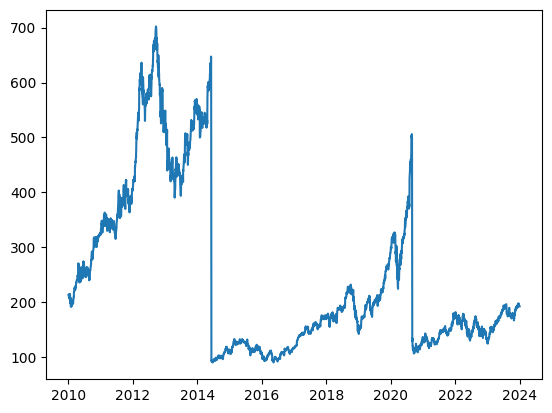

In [251]:
plt.plot(df.Close)

In [253]:
df

,Open,High,Low,Close
date,,,,
2010-01-04,213.43,214.50,212.380,214.01
2010-01-05,214.60,215.59,213.250,214.38
2010-01-06,214.38,215.23,210.750,210.97
2010-01-07,211.75,212.00,209.050,210.58
2010-01-08,210.30,212.00,209.060,211.98
...,...,...,...,...
2023-12-22,195.18,195.41,192.970,193.60
2023-12-26,193.61,193.89,192.830,193.05
2023-12-27,192.49,193.50,191.090,193.15


In [255]:
ma100 = df.Close.rolling(100).mean()
ma100


date
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
                ...   
2023-12-22    181.7683
2023-12-26    181.7871
2023-12-27    181.8987
2023-12-28    182.0460
2023-12-29    182.1733
Name: Close, Length: 3522, dtype: float64

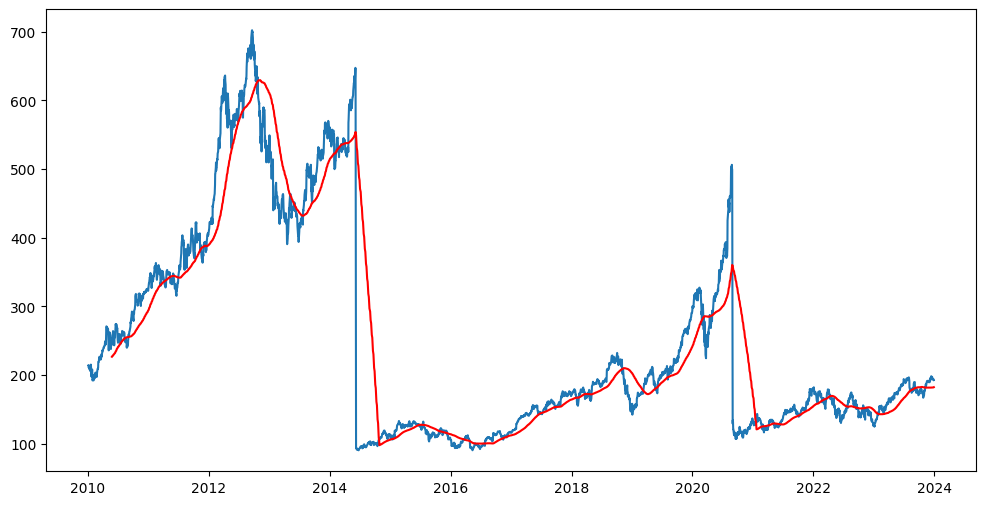

In [257]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')


In [259]:
ma200 = df.Close.rolling(200).mean()
ma200


date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
                ...    
2023-12-22    178.64905
2023-12-26    178.87180
2023-12-27    179.08520
2023-12-28    179.29015
2023-12-29    179.48785
Name: Close, Length: 3522, dtype: float64

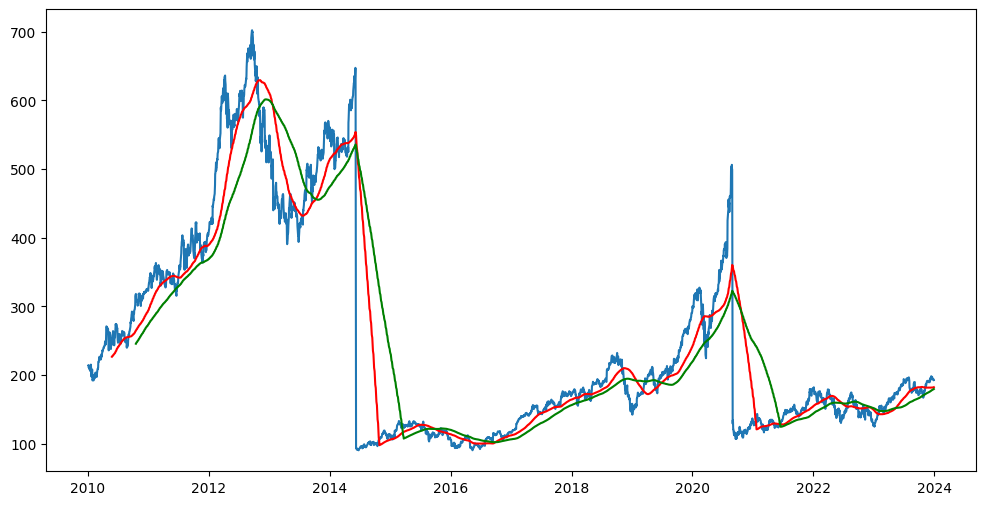

In [261]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')


In [263]:
df.shape

(3522, 4)

In [271]:
#Spliting data into training and testing

data_training = df.loc['2010-01-01':'2022-12-31', ['Close']]
data_testing = df.loc['2023-01-01':'2023-12-31', ['Close']]


print(data_training.shape)
print(data_testing.shape) 



(3272, 1)
(250, 1)


In [ ]:
# Assuming df and future_df are your DataFrames
# Remove empty or all-NA columns from both DataFrames
df_cleaned = df.dropna(how='all', axis=1)
future_df_cleaned = future_df.dropna(how='all', axis=1)

# Concatenate the cleaned DataFrames
combined_df = pd.concat([df_cleaned, future_df_cleaned], axis=0)

In [ ]:
# Prepare data for 2024 prediction
# Assuming you want to predict the next 365 days (2024)
future_days = 365

# Create an empty DataFrame for 2024 dates
future_dates = pd.date_range(start='2024-01-01', periods=future_days, freq='B')  # 'B' denotes business days
future_df = pd.DataFrame(index=future_dates, columns=['Close'])

# Combine the existing data with the future dates
combined_df = pd.concat([df, future_df])

# Fill missing values (if any) - forward fill to propagate last known value
combined_df = combined_df.ffill()

# Scale the combined data
scaler = MinMaxScaler(feature_range=(0, 1))  # Initialize scaler again
scaled_combined_data = scaler.fit_transform(combined_df)

# Prepare input data for prediction
x_input = scaled_combined_data[-100:]

# Generate list to store predictions
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Predicting future stock prices
predictions = []
for i in range(future_days):
    if len(temp_input) > 100:
        x_input = np.array(temp_input[-100:]) # get the last 100 values
        x_input = x_input.reshape((1, 100, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        predictions.append(yhat[0][0])
    else:
        x_input = np.array(temp_input) # use all the values
        x_input = x_input.reshape((1, len(temp_input), 1)) # reshape to correct input size
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        predictions.append(yhat[0][0])

# Transform predictions back to original scale
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

# Create a DataFrame for the predictions
predicted_df = pd.DataFrame(data=predictions, index=future_dates, columns=['Predicted Close'])

# Display the predicted DataFrame
print(predicted_df.head())

In [165]:
data_training.head()

,Close
date,
2010-01-04,214.01
2010-01-05,214.38
2010-01-06,210.97
2010-01-07,210.58
2010-01-08,211.98


In [167]:
data_testing.head()

,Close
date,
2023-01-03,125.07
2023-01-04,126.36
2023-01-05,125.02
2023-01-06,129.62
2023-01-09,130.15


In [169]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [171]:
data_training_array= scaler.fit_transform(data_training)
data_training_array





array([[0.20223268],
       [0.20283744],
       [0.1972639 ],
       ...,
       [0.05844856],
       [0.06428361],
       [0.06480664]])

In [173]:
print(data_training_array.shape)

(3272, 1)


In [175]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train= np.array(x_train), np.array(y_train)

In [177]:
print(x_train.shape)

(3172, 100, 1)


In [179]:
#Ml Model




In [181]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

# Define the model
model = Sequential()

# Add the Input layer (first layer specifying the shape of the input)
model.add(Input(shape=(x_train.shape[1], 1)))

# Add the first LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# Add the second LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Add the third LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Add the fourth LSTM layer
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(units=1))


In [185]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [187]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model (make sure x_train and y_train are properly defined)
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 193ms/step - loss: 0.0517
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - loss: 0.0072
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - loss: 0.0067
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - loss: 0.0074
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - loss: 0.0046
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - loss: 0.0039
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - loss: 0.0037
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - loss: 0.0052
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - loss: 0.0032
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - loss: 0.0031
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - loss: 0.0029
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - loss: 0.0025
Epoch 13/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - loss: 0.0025
Epoch 14/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - loss: 0.0028
Epoch 15/50
100

In [189]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train.reshape(x_train.shape[0], -1), y_train)

rf_predicted = rf_model.predict(x_test.reshape(x_test.shape[0], -1))

rf_mse = mean_squared_error(y_test, rf_predicted)
rf_rmse = np.sqrt(rf_mse)
print(f"Random Forest RMSE: {rf_rmse}")


Random Forest RMSE: 31.747256260219235


In [190]:
# Save the trained model 
model.save('keras_model.keras')


In [191]:
data_testing.head()

,Close
date,
2023-01-03,125.07
2023-01-04,126.36
2023-01-05,125.02
2023-01-06,129.62
2023-01-09,130.15


In [192]:
data_training.tail(100)

,Close
date,
2022-08-10,169.24
2022-08-11,168.49
2022-08-12,172.10
2022-08-15,173.19
2022-08-16,173.03
...,...
2022-12-23,131.86
2022-12-27,130.03
2022-12-28,126.04


In [193]:
past_100_days = data_training.tail(100)

In [194]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [195]:
final_df.head()

,Close
0,169.24
1,168.49
2,172.10
3,173.19
4,173.03


In [196]:
input_data = scaler.fit_transform(final_df)
print(input_data)

[[6.05007525e-01]
 [5.94746203e-01]
 [6.44137365e-01]
 [6.59050486e-01]
 [6.56861404e-01]
 [6.77657682e-01]
 [6.72184977e-01]
 [6.36201943e-01]
 [5.82158982e-01]
 [5.77507183e-01]
 [5.81611712e-01]
 [6.15816117e-01]
 [5.28116021e-01]
 [4.97468874e-01]
 [4.63674921e-01]
 [4.40552743e-01]
 [4.50677247e-01]
 [4.21261458e-01]
 [4.03748803e-01]
 [4.23313723e-01]
 [4.02791079e-01]
 [4.42605008e-01]
 [5.25516487e-01]
 [3.94308387e-01]
 [4.14420577e-01]
 [3.74196196e-01]
 [3.51347654e-01]
 [4.03064715e-01]
 [4.36174579e-01]
 [3.92666575e-01]
 [3.79258448e-01]
 [3.47653578e-01]
 [3.52305377e-01]
 [3.65850322e-01]
 [3.39581338e-01]
 [2.38883568e-01]
 [1.80325626e-01]
 [2.38473115e-01]
 [2.88411547e-01]
 [2.92516076e-01]
 [2.79244767e-01]
 [2.06184157e-01]
 [2.10699138e-01]
 [1.90997400e-01]
 [1.82241073e-01]
 [2.45861267e-01]
 [1.82788343e-01]
 [2.37925845e-01]
 [2.56259406e-01]
 [2.57764400e-01]
 [2.51333972e-01]
 [3.04419209e-01]
 [3.34245451e-01]
 [3.73785744e-01]
 [3.32877275e-01]
 [2.706252

In [197]:
input_data.shape

(350, 1)

In [198]:
x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    

In [199]:
x_test, y_test= np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(250, 100, 1)
(250,)


In [200]:
#Marking prediction

y_predicted = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step


In [225]:
# Extend prediction for 2024
future_days = 365  # Predicting for full year 2024

for i in range(future_days):
    last_100_days = input_data[-100:].reshape(1, 100, 1)
    next_pred = model.predict(last_100_days)
    input_data = np.append(input_data, next_pred)
    
# Transform predictions back to original scale
input_data = input_data * scale_factor

# Extract 2024 predictions
predicted_2024 = input_data[-future_days:]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━

In [227]:
y_predicted.shape

(250, 1)

In [229]:
y_test

array([3.20487580e-02, 8.58906714e-01, 0.00000000e+00, 2.94848574e+00,
       3.28820257e+00, 3.65996816e+00, 5.42905960e+00, 5.37778159e+00,
       6.24309806e+00, 6.99944875e+00, 6.53153688e+00, 6.56999539e+00,
       8.23653080e+00, 1.03132903e+01, 1.12234750e+01, 1.07940217e+01,
       1.21400695e+01, 1.34027906e+01, 1.15247334e+01, 1.23515913e+01,
       1.30823030e+01, 1.65371591e+01, 1.88959477e+01, 1.71204465e+01,
       1.89920940e+01, 1.72422318e+01, 1.65692079e+01, 1.66589444e+01,
       1.84793139e+01, 1.80626800e+01, 1.94279571e+01, 1.83895773e+01,
       1.76460462e+01, 1.50372772e+01, 1.53128966e+01, 1.56269744e+01,
       1.39027512e+01, 1.46783312e+01, 1.43514338e+01, 1.30053860e+01,
       1.33899711e+01, 1.66717639e+01, 1.84664944e+01, 1.70371197e+01,
       1.78511582e+01, 1.63897348e+01, 1.50500968e+01, 1.63128178e+01,
       1.76716852e+01, 1.79280752e+01, 1.97612642e+01, 1.92164353e+01,
       2.07547757e+01, 2.19598090e+01, 2.10303950e+01, 2.17354677e+01,
      

In [231]:
y_predicted

array([[ 6.2054033],
       [ 5.7873445],
       [ 5.3813276],
       [ 4.9839387],
       [ 4.7380233],
       [ 4.618735 ],
       [ 4.57213  ],
       [ 4.6055274],
       [ 4.693355 ],
       [ 4.8438115],
       [ 5.067692 ],
       [ 5.358844 ],
       [ 5.6972275],
       [ 6.0824995],
       [ 6.5125456],
       [ 6.9723716],
       [ 7.4588175],
       [ 7.9669614],
       [ 8.492388 ],
       [ 9.024538 ],
       [ 9.558935 ],
       [10.097945 ],
       [10.658614 ],
       [11.287691 ],
       [12.001277 ],
       [12.863394 ],
       [13.805973 ],
       [14.604339 ],
       [15.12197  ],
       [15.548888 ],
       [15.976595 ],
       [16.51471  ],
       [17.071667 ],
       [17.498611 ],
       [17.407114 ],
       [16.762697 ],
       [16.018282 ],
       [15.275471 ],
       [14.752691 ],
       [14.451634 ],
       [14.232248 ],
       [14.0697775],
       [14.106068 ],
       [14.36052  ],
       [14.828864 ],
       [15.463003 ],
       [16.100851 ],
       [16.45

In [233]:
scaler.scale_

array([0.01368176])

In [235]:
scale_factor = 1/0.02134523
y_predicted = y_predicted * scale_factor
y_test = y_test* scale_factor

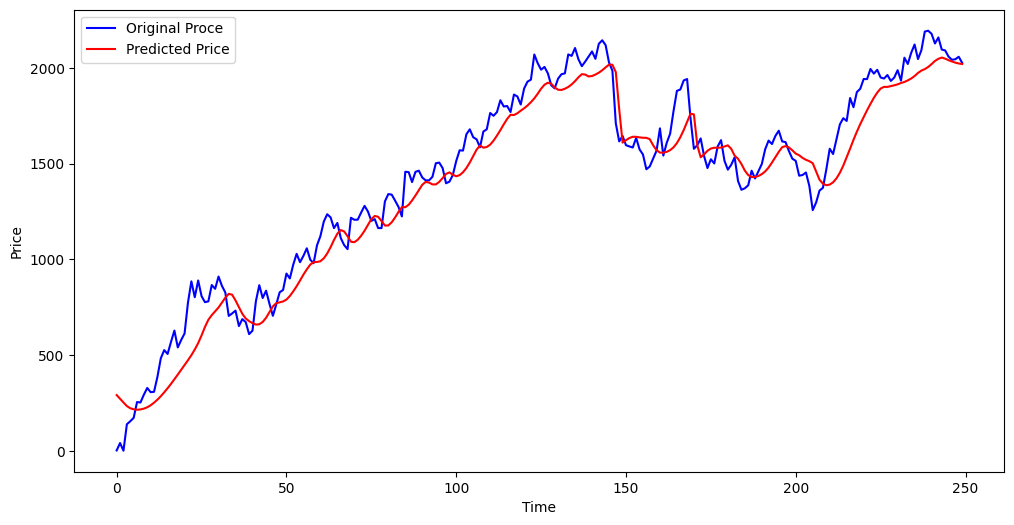

In [237]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label = 'Original Proce')
plt.plot(y_predicted, 'r' , label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [239]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 16123.67881668608
Root Mean Squared Error (RMSE): 126.97904873122212
